In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

import plotly.express as px
import plotly.graph_objects as go

from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected = True)
from sklearn.metrics import accuracy_score

import seaborn as sns


In [2]:
victims = pd.read_csv('victims_of_rape.csv')


In [3]:
victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
rape_victims = victims[victims['Subgroup'] == 'Victims of Incest Rape']
rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [5]:
#Remove Null Values
victims.dropna()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


Extracting Relevent Features

In [6]:
victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [7]:
victims.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1050.0,2005.500000,2.873650,2001.0,2003.0,2005.5,2008.00,2010.0
Rape_Cases_Reported,1050.0,361.920000,592.180572,0.0,4.0,37.0,527.50,3135.0
Victims_Above_50_Yrs,1050.0,1.866667,4.640286,0.0,0.0,0.0,1.00,43.0
Victims_Between_10-14_Yrs,1050.0,23.657143,50.677418,0.0,0.0,3.0,19.00,416.0
Victims_Between_14-18_Yrs,1050.0,53.085714,115.127899,0.0,0.0,5.0,42.00,826.0
Victims_Between_18-30_Yrs,1050.0,212.937143,350.135760,0.0,1.0,15.5,308.00,1835.0
Victims_Between_30-50_Yrs,1050.0,60.236190,118.322713,0.0,0.0,4.0,58.75,811.0
Victims_of_Rape_Total,1050.0,362.198095,592.418089,0.0,4.0,37.0,531.50,3136.0
Victims_Upto_10_Yrs,1050.0,10.415238,19.533134,0.0,0.0,2.0,11.00,131.0


In [8]:
#Data Preprocessing
data = pd.DataFrame(rape_victims.groupby(['Year'])['Victims_of_Rape_Total'].sum().reset_index())
data

,Year,Victims_of_Rape_Total
0,2001,439
1,2002,369
2,2003,400
3,2004,506
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,322
9,2010,288


In [9]:
#Diveded Into Column for histograms
data.columns = ['Year', 'Victims_of_Rape_Total']
data.columns
data

,Year,Victims_of_Rape_Total
0,2001,439
1,2002,369
2,2003,400
3,2004,506
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,322
9,2010,288


In [10]:
plt.figure(figsize=(10,5))
fig= px.bar(data, x='Year', y='Victims_of_Rape_Total', color_discrete_sequence=['black'])
fig.show()

<Figure size 1000x500 with 0 Axes>

In [11]:
data1 = pd.DataFrame(rape_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
data1

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunachal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [12]:
data1.columns=['State/UT', 'Cases Reported']
data1.columns


Index(['State/UT', 'Cases Reported'], dtype='object')

In [13]:
data1

,State/UT,Cases Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunachal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [14]:
above_50 = rape_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = rape_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = rape_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = rape_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = rape_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = rape_victims['Victims_Upto_10_Yrs'].sum()

In [15]:
age_grp = ['Upto 10','10 to 14', '14 to 18', '18 to 30', '30 to 50','Above 50']
age_grp_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp,values=age_grp_vals,sort=True,marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])
fig.show()

In [16]:
dataset = pd.DataFrame()
dataset['Area_Name'] = victims['Area_Name']
dataset['Year'] = victims['Year']
dataset['Victims_of_Rape_Total'] = victims['Victims_of_Rape_Total']
dataset.Area_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,0] = le.fit_transform(dataset.iloc[:,0])
dataset

,Area_Name,Year,Victims_of_Rape_Total
0,0,2001,3
1,0,2001,1
2,0,2001,2
3,0,2002,2
4,0,2002,0
...,...,...,...
1045,34,2009,3
1046,34,2009,2333
1047,34,2010,2311
1048,34,2010,4


In [18]:
dataset.head(34)

,Area_Name,Year,Victims_of_Rape_Total
0,0,2001,3
1,0,2001,1
2,0,2001,2
3,0,2002,2
4,0,2002,0
5,0,2002,2
6,0,2003,2
7,0,2003,0
8,0,2003,2
9,0,2004,10


In [19]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,:-1]


In [20]:
x.head()

,Area_Name,Year
0,0,2001
1,0,2001
2,0,2001
3,0,2002
4,0,2002


In [21]:
y.head()

,Area_Name,Year
0,0,2001
1,0,2001
2,0,2001
3,0,2002
4,0,2002


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

regressor = KNeighborsClassifier(n_neighbors=5)
regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)
pred

C:\Users\nages\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([[  24, 2008],
       [  20, 2009],
       [  23, 2004],
       [  24, 2007],
       [  16, 2006],
       [   1, 2010],
       [   1, 2001],
       [  18, 2005],
       [  22, 2008],
       [  16, 2006],
       [  10, 2004],
       [  34, 2002],
       [   3, 2008],
       [  27, 2007],
       [   3, 2007],
       [  24, 2008],
       [  28, 2002],
       [  23, 2004],
       [  21, 2010],
       [  28, 2003],
       [  22, 2004],
       [  15, 2003],
       [  24, 2007],
       [  20, 2009],
       [  13, 2001],
       [  31, 2004],
       [   9, 2010],
       [  11, 2009],
       [  24, 2001],
       [  25, 2004],
       [  17, 2010],
       [  33, 2009],
       [  17, 2006],
       [  29, 2010],
       [   0, 2002],
       [   2, 2006],
       [  12, 2006],
       [  22, 2010],
       [  31, 2009],
       [  14, 2001],
       [   9, 2006],
       [  20, 2007],
       [  10, 2010],
       [  16, 2009],
       [  25, 2008],
       [  19, 2003],
       [   0, 2007],
       [   0,

In [24]:
metrics.mean_absolute_error(y_test,pred)

NameError: name 'metrics' is not defined

In [ ]:
metrics.r2_score(y_test,pred)

ANOTHER CRIME

In [25]:
data2 = pd.read_csv('auto_theft.csv')
data2.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946
5,Chandigarh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,107.0,281
6,Chhattisgarh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,338.0,790
7,Dadra & Nagar Haveli,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,12
8,Delhi,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,62.0,688.0,3185
9,Goa,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,9.0,68.0,152


In [26]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1865.0,2005.564075,2.853598,2001.0,2003.0,2006.0,2008.0,2010.0
Auto_Theft_Coordinated/Traced,1519.0,74.541145,270.195127,0.0,0.0,2.0,27.0,2985.0
Auto_Theft_Recovered,1837.0,297.927055,677.445512,0.0,4.0,29.0,177.0,5453.0
Auto_Theft_Stolen,1865.0,1029.431635,2399.389932,0.0,7.0,80.0,521.0,18605.0


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area_Name                      1865 non-null   object 
 1   Year                           1865 non-null   int64  
 2   Group_Name                     1865 non-null   object 
 3   Sub_Group_Name                 1865 non-null   object 
 4   Auto_Theft_Coordinated/Traced  1519 non-null   float64
 5   Auto_Theft_Recovered           1837 non-null   float64
 6   Auto_Theft_Stolen              1865 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 102.1+ KB


In [28]:
dataset = pd.DataFrame()
dataset['Area_Name'] = data2['Area_Name']
dataset['Year'] = data2['Year']
dataset['Auto_Theft_Stolen'] = data2['Auto_Theft_Stolen']
dataset.Area_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Daman & Diu', 'Lakshadweep'],
      dtype=object)

In [29]:
data2.Group_Name.value_counts()

AT6-Total                                         344
AT1-Motor Cycles/ Scooters                        341
AT2-Motor Car/Taxi/Jeep                           331
AT5-Other Motor vehicles                          303
AT4-Goods carrying vehicles (Trucks/Tempo etc)    292
AT3-Buses                                         254
Name: Group_Name, dtype: int64

In [30]:
data2.Sub_Group_Name.value_counts()

6. Total (Sum of 1-5 Above)                      344
1. Motor Cycles/ Scooters                        341
2. Motor Car/Taxi/Jeep                           331
5. Other Motor vehicles                          303
4. Goods carrying vehicles (Trucks/Tempo etc)    292
3. Buses                                         254
Name: Sub_Group_Name, dtype: int64

In [31]:
auto_theft_traced = data2['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = data2['Auto_Theft_Recovered'].sum()
auto_theft_stolen = data2['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

colors = ['black','blue','red']

fig = go.Figure(data=[go.Pie(labels=vehicle_group, values=vehicle_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

In [32]:
vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

sr_no = [1,2,3,4,5]

fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[sr_no,vehicle_list],
                            height=30))
                     ])
fig.show()

In [33]:
g2 = pd.DataFrame(data2.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())

g2.columns = ['Year','Vehicles Stolen']

fig = px.bar(g2,x='Year',y='Vehicles Stolen',color_discrete_sequence=['#00CC96'])
fig.show()

In [34]:
motor_c = data2[data2['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g3 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g3_sorted = g3.sort_values(['Auto_Theft_Stolen'],ascending=True)
fig = px.scatter(g3_sorted.iloc[-10:,:], y='Area_Name', x='Auto_Theft_Stolen',
             orientation='h',color_discrete_sequence=["red"])
fig.show()

In [35]:
motor_c = data2[data2['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g4 = pd.DataFrame(motor_c.groupby(['Auto_Theft_Recovered'])['Auto_Theft_Stolen'].sum().reset_index())
g4_sorted = g4.sort_values(['Auto_Theft_Stolen'],ascending=True)
fig = px.line(g4_sorted.iloc[-10:,:], y='Auto_Theft_Recovered', x='Auto_Theft_Stolen',
             orientation='h',color_discrete_sequence=['#008080'])
fig.show()

In [36]:
g4['Difference']=g4["Auto_Theft_Stolen"]- g4["Auto_Theft_Recovered"]
g4

,Auto_Theft_Recovered,Auto_Theft_Stolen,Difference
0,0.0,0,0.0
1,1.0,10,9.0
2,2.0,62,60.0
3,3.0,85,82.0
4,4.0,278,274.0
...,...,...,...
239,3571.0,4865,1294.0
240,3625.0,7244,3619.0
241,3731.0,14723,10992.0
242,3791.0,15126,11335.0


In [37]:
g4['Percent_Recovery_Cases']=(g4["Auto_Theft_Recovered"]/ g4["Auto_Theft_Stolen"])*100
g4.Percent_Recovery_Cases

0            NaN
1      10.000000
2       3.225806
3       3.529412
4       1.438849
         ...    
239    73.401850
240    50.041414
241    25.341303
242    25.062806
243    70.274689
Name: Percent_Recovery_Cases, Length: 244, dtype: float64

In [38]:
g4['Percent_Recovery_Cases']=(g4["Auto_Theft_Recovered"]/ g4["Auto_Theft_Stolen"])*100


g4.Percent_Recovery_Cases.sort_values().mean()

28.638161822617022

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,0] = le.fit_transform(dataset.iloc[:,-1])
dataset.head()

,Area_Name,Year,Auto_Theft_Stolen
0,4,2001,4
1,565,2001,2725
2,27,2001,27
3,174,2001,205
4,415,2001,946


In [40]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,:-1]

In [41]:
x.head()

,Area_Name,Year
0,4,2001
1,565,2001
2,27,2001
3,174,2001
4,415,2001


In [42]:
y.head()

,Area_Name,Year
0,4,2001
1,565,2001
2,27,2001
3,174,2001
4,415,2001


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [44]:
from sklearn.ensemble import RandomForestClassifier
knn = RandomForestClassifier(n_estimators=50)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([[ 547, 2008],
       [   3, 2009],
       [  65, 2008],
       [ 328, 2007],
       [   0, 2003],
       [ 146, 2002],
       [   0, 2005],
       [   0, 2010],
       [ 101, 2004],
       [  22, 2008],
       [ 386, 2002],
       [ 420, 2001],
       [ 469, 2010],
       [ 173, 2007],
       [ 588, 2005],
       [ 408, 2004],
       [  45, 2002],
       [   0, 2004],
       [   0, 2010],
       [ 587, 2002],
       [  15, 2001],
       [ 390, 2003],
       [ 356, 2002],
       [  33, 2008],
       [ 117, 2010],
       [ 704, 2002],
       [   2, 2009],
       [  53, 2008],
       [ 260, 2007],
       [   0, 2003],
       [  15, 2006],
       [ 161, 2002],
       [  59, 2004],
       [  33, 2007],
       [  19, 2008],
       [  28, 2007],
       [ 100, 2003],
       [   2, 2007],
       [ 282, 2010],
       [  13, 2006],
       [ 396, 2010],
       [ 241, 2004],
       [ 282, 2010],
       [ 633, 2006],
       [  15, 2009],
       [ 490, 2009],
       [ 612, 2001],
       [   1,

In [45]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [46]:
metrics.mean_absolute_error(y_test,y_pred)


1.3310991957104559

In [47]:
metrics.r2_score(y_test,y_pred)

0.9997545872847381

ANOTHER CRIME

In [48]:
data3 = pd.read_csv('property_stolen_and_recovered.csv')
data3.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [49]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2449.0,2.005499e+03,2.873294e+00,2001.0,2003.0,2005.0,2008.0,2.010000e+03
Cases_Property_Recovered,2449.0,1.232892e+03,3.079574e+03,0.0,13.0,113.0,722.0,2.796000e+04
Cases_Property_Stolen,2449.0,3.419421e+03,8.136257e+03,0.0,45.0,358.0,1875.0,8.066300e+04
Value_of_Property_Recovered,2449.0,5.859924e+07,2.494403e+08,0.0,684570.0,5851830.0,34063947.0,7.470011e+09
Value_of_Property_Stolen,2449.0,2.465431e+08,9.670035e+08,0.0,3649018.0,27018001.0,121457955.0,2.377625e+10


In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Name                    2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [51]:
ds = pd.DataFrame()
ds['Area_Name'] = data3['Area_Name']
ds['Year'] = data3['Year']
ds['Cases_Property_Stolen'] = data3['Cases_Property_Stolen']
ds.head()

,Area_Name,Year,Cases_Property_Stolen
0,Andaman & Nicobar Islands,2001,64
1,Andhra Pradesh,2001,7134
2,Arunachal Pradesh,2001,248
3,Assam,2001,2423
4,Bihar,2001,3231


In [52]:
g5 = pd.DataFrame(data3.groupby(['Year'])['Cases_Property_Stolen'].sum().reset_index())

g5.columns = ['Year','Cases_Property_Stolen']

fig = px.bar(g5,x='Year',y='Cases_Property_Stolen',color_discrete_sequence=['#00CC96'])
fig.show()

In [53]:
data3.Year.value_counts()

2001    245
2002    245
2003    245
2004    245
2005    245
2006    245
2008    245
2009    245
2010    245
2007    244
Name: Year, dtype: int64

In [54]:
data3.Group_Name.value_counts()

Burglary - Property                    350
Criminal Breach of Trust - Property    350
Dacoity -Property                      350
Other heads of Property                350
Robbery - Property                     350
Theft - Property                       350
Total Property                         349
Name: Group_Name, dtype: int64

In [55]:
a=data3.groupby(['Group_Name']).get_group('Robbery - Property')
a.Sub_Group_Name.value_counts()

b=data3.groupby(['Group_Name']).get_group('Total Property')
b.Sub_Group_Name.value_counts()

7. Total Property Stolen & Recovered    349
Name: Sub_Group_Name, dtype: int64

<AxesSubplot:xlabel='Area_Name', ylabel='Cases_Property_Stolen'>

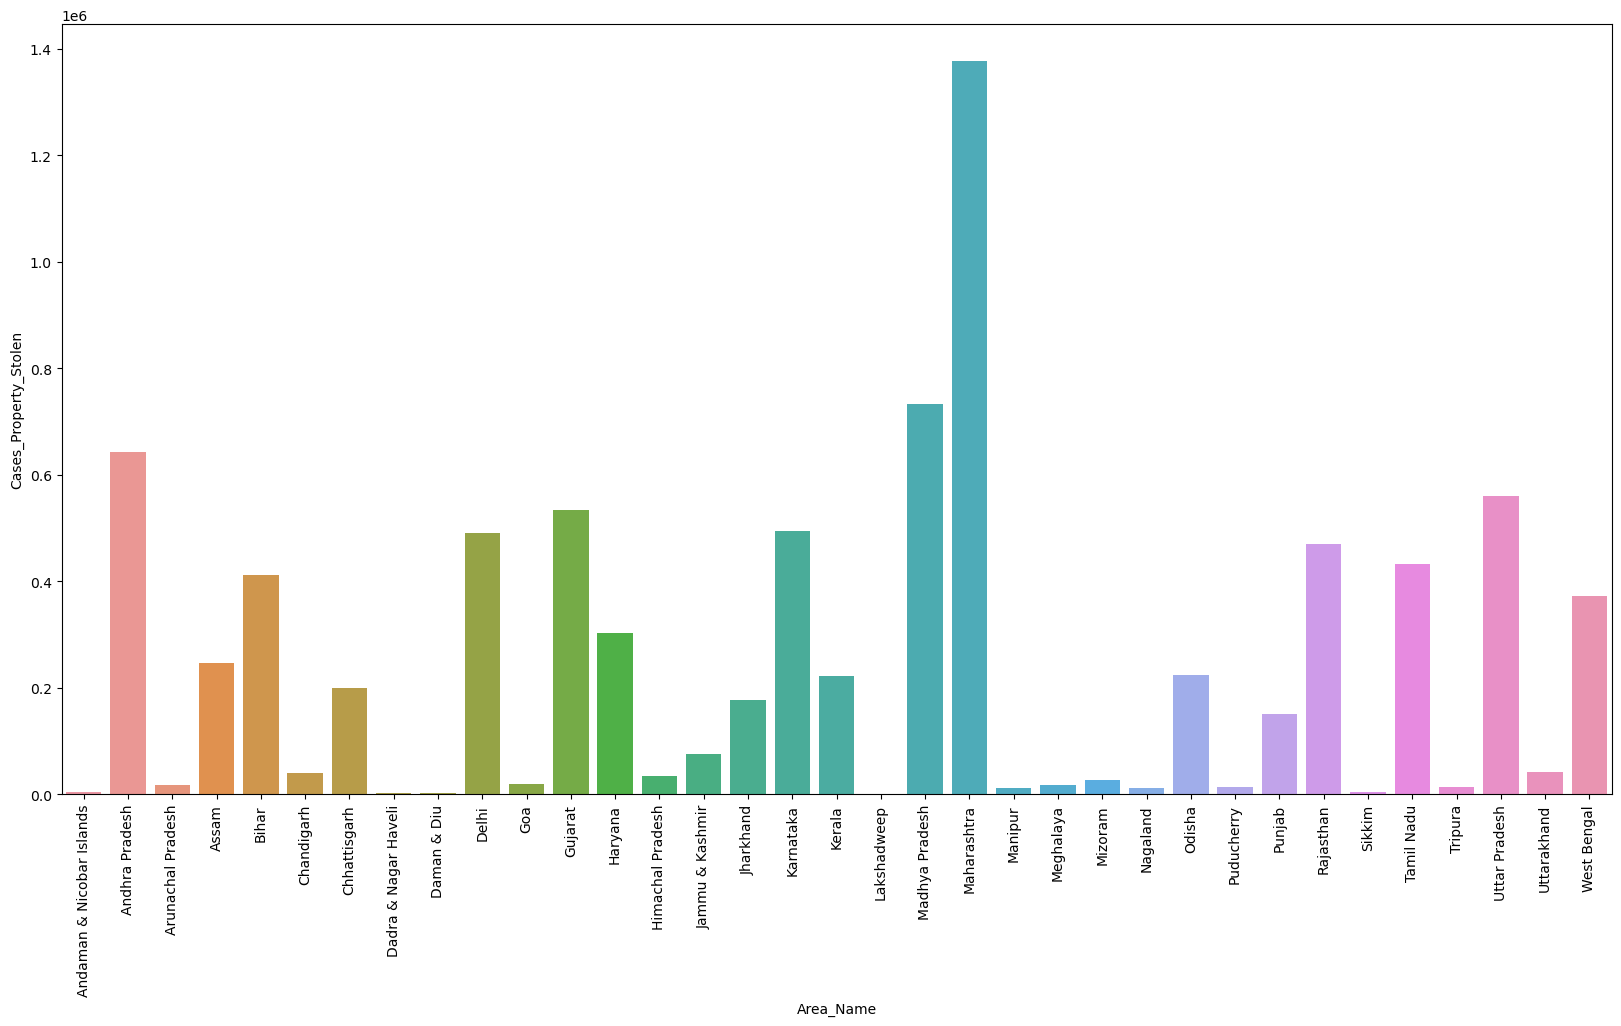

In [56]:
prop1=data3.drop(['Sub_Group_Name'],axis=1)
property_bystate=prop1.groupby(['Area_Name'],as_index=False).sum()
property_bystate.drop("Year",axis=1,inplace=True)
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

<AxesSubplot:xlabel='Year', ylabel='Cases_Property_Stolen'>

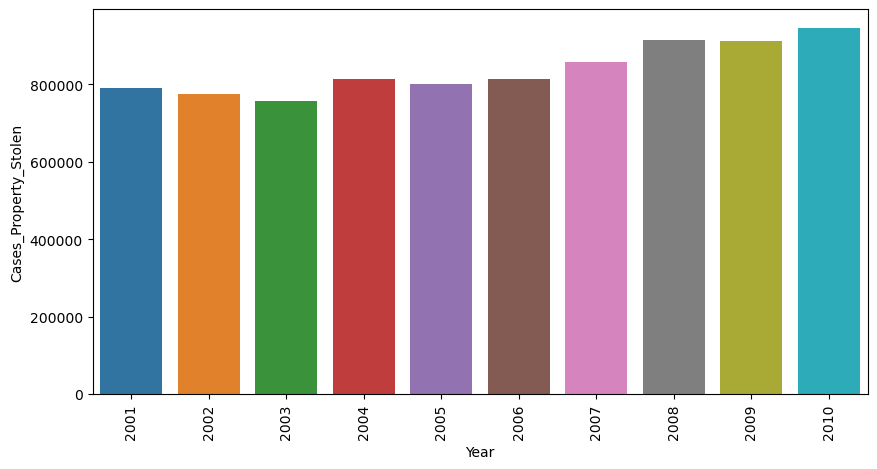

In [57]:
sortbyyear=prop1.groupby(['Year'],as_index=False).sum()
sortbyyear
plt.figure(figsize = (10,5))
chart=sns.barplot(x=sortbyyear.Year,y=sortbyyear.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

<AxesSubplot:xlabel='Year', ylabel='Value_of_Property_Stolen'>

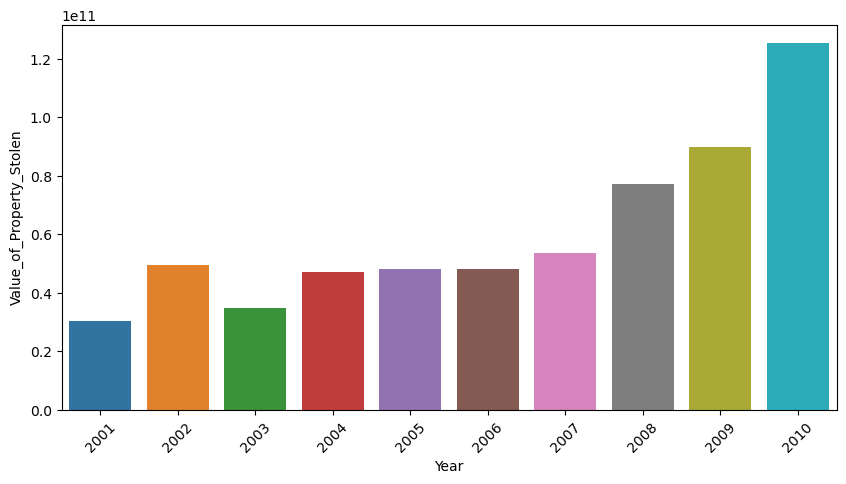

In [58]:
plt.figure(figsize = (10,5))
chart=sns.barplot(x=sortbyyear.Year,y=sortbyyear.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

<AxesSubplot:xlabel='Area_Name', ylabel='Value_of_Property_Stolen'>

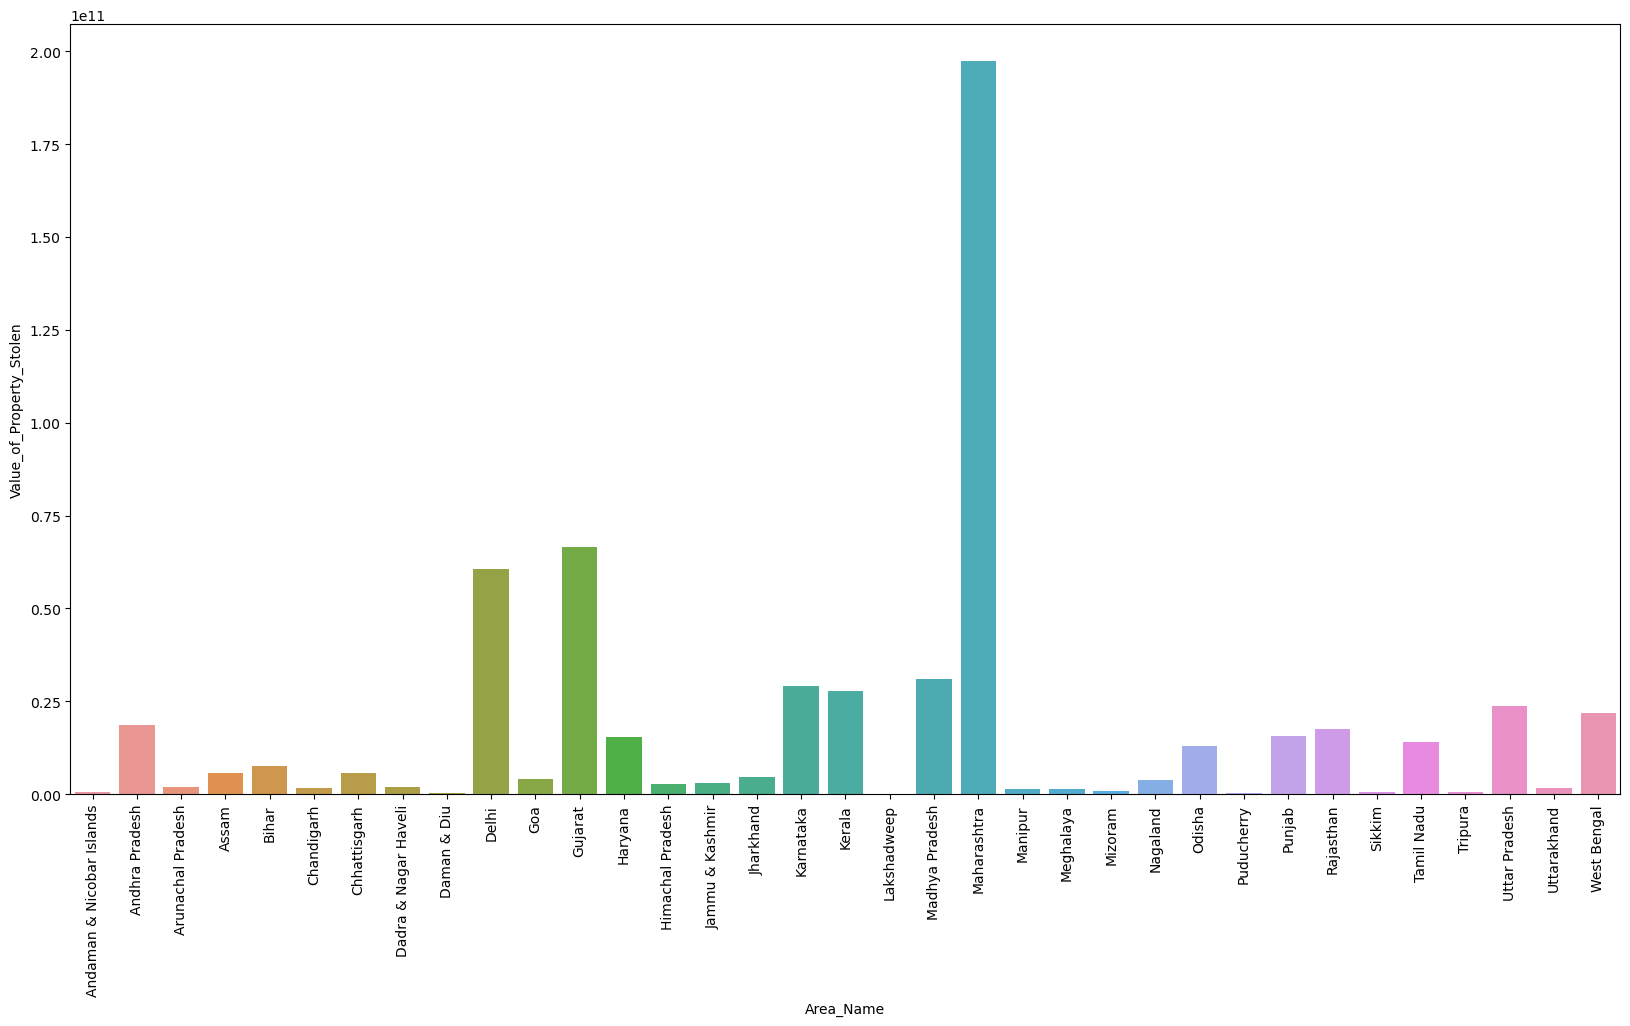

In [59]:
plt.figure(figsize = (20,10))
chart=sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

In [60]:
prop1.groupby(['Group_Name']).get_group('Robbery - Property')

,Area_Name,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
1400,Andaman & Nicobar Islands,2001,Robbery - Property,2,4,2000,40000
1401,Andhra Pradesh,2001,Robbery - Property,293,622,7149310,22872277
1402,Arunachal Pradesh,2001,Robbery - Property,30,84,1436973,2535439
1403,Assam,2001,Robbery - Property,146,687,3773502,16336928
1404,Bihar,2001,Robbery - Property,441,2201,12827627,51594151
...,...,...,...,...,...,...,...
1745,Tamil Nadu,2010,Robbery - Property,1326,1817,70981709,117163496
1746,Tripura,2010,Robbery - Property,16,63,396035,1318455
1747,Uttar Pradesh,2010,Robbery - Property,1223,2007,121061420,246998602
1748,Uttarakhand,2010,Robbery - Property,100,152,8107570,14016919


<AxesSubplot:xlabel='Cases_Property_Recovered', ylabel='Cases_Property_Stolen'>

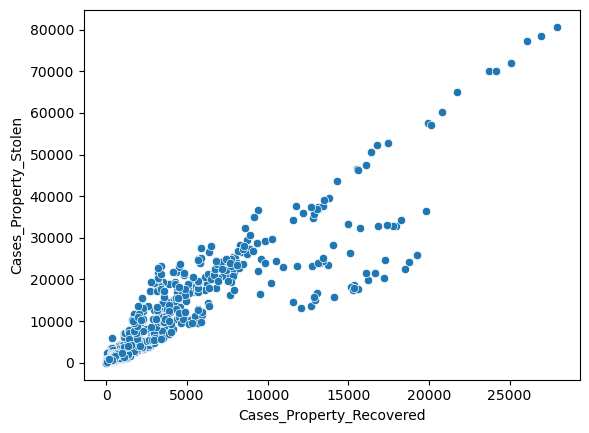

In [61]:
sns.scatterplot(x=prop1.Cases_Property_Recovered,y=prop1.Cases_Property_Stolen)

In [62]:
property_bystate['Difference']=property_bystate["Cases_Property_Stolen"]- property_bystate["Cases_Property_Recovered"]
property_bystate.head(35)

,Area_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Difference
0,Andaman & Nicobar Islands,1516,3662,53629194,646746834,2146
1,Andhra Pradesh,332510,642822,8320971694,18762833176,310312
2,Arunachal Pradesh,6048,16632,646754238,1895885402,10584
3,Assam,54784,245560,1521007674,5814831574,190776
4,Bihar,63876,411840,1098784766,7549162134,347964
5,Chandigarh,15188,39720,625548682,1674993984,24532
6,Chhattisgarh,68912,199712,1932428432,5770126842,130800
7,Dadra & Nagar Haveli,1170,2642,225144198,2007055568,1472
8,Daman & Diu,534,2056,81535334,375254250,1522
9,Delhi,157858,490694,2777898238,60706985834,332836


In [66]:
property_bystate['Percent_Recovery_Cases']=(property_bystate["Cases_Property_Recovered"]/ property_bystate["Cases_Property_Stolen"])*100

property_bystate.Percent_Recovery_Cases.head(10)

0    41.398143
1    51.726605
2    36.363636
3    22.309822
4    15.509907
5    38.237664
6    34.505688
7    44.284633
8    25.972763
9    32.170355
Name: Percent_Recovery_Cases, dtype: float64

In [64]:
property_bystate.Percent_Recovery_Cases.sort_values().mean()

34.819519654956714